In [13]:
import pandas as pd
from pandas import DataFrame


In [14]:
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
from pandas import DataFrame
data=DataFrame()
dataexcel=pd.read_excel(r'C:\Users\Chach\OneDrive - University of Calgary\2021 Fall\ENDG 319\CURE\Deliverable4\weatherop.xlsx')

dataexcel

,Number of days,Temperature,Humidity,Wind Speed,Pressure,Visibility,Precipitation_classes
0,1,9.472222,0.95000,8.001200,1015.13,15.874600,0
1,2,9.355556,0.94000,8.001540,1015.63,15.874600,0
2,3,9.377778,0.93000,8.110200,1015.94,15.826300,0
3,4,8.288889,0.92000,8.110290,1016.41,15.826300,0
4,5,8.755556,0.92122,8.112039,1016.51,15.826300,0
...,...,...,...,...,...,...,...
111,112,9.050000,0.57400,28.480900,1010.00,4.827100,1
112,113,9.050000,0.56890,28.513100,1009.98,4.739200,1
113,114,9.183333,0.56930,29.833300,1010.05,4.693493,1
114,115,9.072222,0.56740,30.863700,1010.10,4.522100,1


In [23]:
f0,f1=dataexcel.Precipitation_classes.value_counts()
f0,f1

(70, 46)

(70, 46)

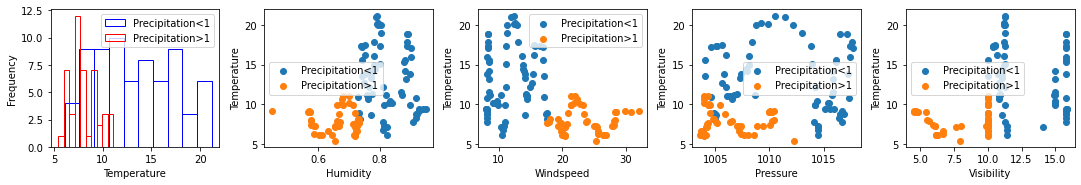

In [36]:
import matplotlib.pyplot as plt
fig,axs =plt.subplots(figsize=(15,2.5))

axs1=plt.subplot2grid(shape=(1,5),loc=(0,0))
axs2=plt.subplot2grid(shape=(1,5),loc=(0,1))
axs3=plt.subplot2grid(shape=(1,5),loc=(0,2))
axs4=plt.subplot2grid(shape=(1,5),loc=(0,3))
axs5=plt.subplot2grid(shape=(1,5),loc=(0,4))

plt.tight_layout()

axs1.hist(dataexcel.iloc[0:f0,1],edgecolor='b',fc='none',label='Precipitation<1')
axs1.hist(dataexcel.iloc[f0:f0+f1,1],edgecolor='r',fc='none',label='Precipitation>1')
axs1.set_xlabel('Temperature')
axs1.set_ylabel('Frequency')
axs1.legend()

axs2.scatter(dataexcel.iloc[0:f0,2],dataexcel.iloc[0:f0,1],label='Precipitation<1')
axs2.scatter(dataexcel.iloc[f0:f0+f1,2],dataexcel.iloc[f0:f0+f1,1],label='Precipitation>1')
axs2.set_xlabel('Humidity')
axs2.set_ylabel('Temperature')
axs2.legend()

axs3.scatter(dataexcel.iloc[0:f0,3],dataexcel.iloc[0:f0,1],label='Precipitation<1')
axs3.scatter(dataexcel.iloc[f0:f0+f1,3],dataexcel.iloc[f0:f0+f1,1],label='Precipitation>1')
axs3.set_xlabel('Windspeed')
axs3.set_ylabel('Temperature')
axs3.legend()

axs4.scatter(dataexcel.iloc[0:f0,4],dataexcel.iloc[0:f0,1],label='Precipitation<1')
axs4.scatter(dataexcel.iloc[f0:f0+f1,4],dataexcel.iloc[f0:f0+f1,1],label='Precipitation>1')
axs4.set_xlabel('Pressure')
axs4.set_ylabel('Temperature')
axs4.legend()

axs5.scatter(dataexcel.iloc[0:f0,5],dataexcel.iloc[0:f0,1],label='Precipitation<1')
axs5.scatter(dataexcel.iloc[f0:f0+f1,5],dataexcel.iloc[f0:f0+f1,1],label='Precipitation>1')
axs5.set_xlabel('Visibility')
axs5.set_ylabel('Temperature')
axs5.legend()

f0,f1=dataexcel.Precipitation_classes.value_counts()
f0,f1


               A                          B                        C                        D                       E

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataX = dataexcel.drop(columns = ['Precipitation_classes'])
sy = dataexcel.Precipitation_classes

dataX_train, dataX_test, sy_train, sy_test = train_test_split(dataX,sy)

In [37]:
le = preprocessing.LabelEncoder()

le = le.fit(sy_train)
y_train = le.transform(sy_train)
sy_train, y_train

(26     0
 37     0
 2      0
 0      0
 59     1
       ..
 45     0
 68     1
 87     1
 8      0
 106    1
 Name: Precipitation_classes, Length: 87, dtype: int64,
 array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       dtype=int64))

### MinMaxScaler

In [38]:
y_train = le.transform(sy_train)

In [39]:
dataX_train.to_numpy()

n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(dataX_train.to_numpy())

X_train = n1.transform(dataX_train.to_numpy())
X_train

array([[2.26086957e-01, 3.64855189e-01, 7.42058000e-01, 9.92857911e-02,
        3.66619116e-01, 9.14984247e-01],
       [3.21739130e-01, 9.27663993e-01, 7.08191800e-01, 1.37925898e-01,
        6.16975749e-01, 5.94758242e-01],
       [1.73913043e-02, 2.50176491e-01, 9.60000000e-01, 4.51035727e-03,
        8.82310984e-01, 9.95749212e-01],
       [0.00000000e+00, 2.56175053e-01, 1.00000000e+00, 0.00000000e+00,
        8.24536377e-01, 1.00000000e+00],
       [5.13043478e-01, 6.82427595e-01, 6.05862000e-01, 3.13805004e-01,
        1.71184023e-01, 5.42331861e-01],
       [9.73913043e-01, 2.29357841e-01, 2.37800000e-01, 8.48770617e-01,
        4.57203994e-01, 1.99954236e-02],
       [2.69565217e-01, 1.49964740e-01, 7.24684000e-01, 1.25934141e-01,
        7.55349501e-01, 5.94758242e-01],
       [7.47826087e-01, 2.82639441e-01, 4.64200000e-01, 5.54306357e-01,
        5.13552068e-02, 4.81403904e-01],
       [1.30434783e-01, 8.55681126e-01, 8.86056400e-01, 1.48022477e-02,
        9.20114123e-01, 

In [40]:
X_train.shape

(87, 6)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 45)
knn = knn.fit(X_train, y_train)

y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

y_test = le.transform(sy_test.to_numpy())
X_test = n1.transform(dataX_test.to_numpy())

knn.predict(X_test)

y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [42]:
knn.score(X_test, y_test)

0.9655172413793104

In [43]:
knn.score(X_train, y_train)

0.9540229885057471

In [44]:
knn.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [45]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1], dtype=int64)

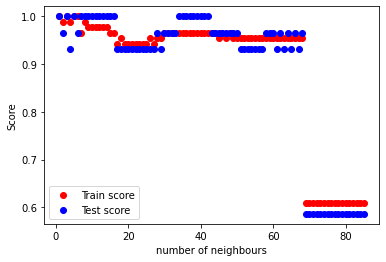

In [46]:
Min_Max_acc_X = []
Min_Max_acc_Y = []
Min_Max_acc_Y_train = [] 
import numpy as np
#since we are using 86 traing rows we will try k values from 1 to 86
i = 1 
while i<86:
    Min_Max_acc_X.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train,y_train)
    Min_Max_acc_Y.append(knn.score(X_test, y_test)) 
    Min_Max_acc_Y_train.append(knn.score(X_train, y_train))

    i += 1
    
fig, ax = plt.subplots()
X_minmax = np.array(Min_Max_acc_X)
Y_minmax = np.array(Min_Max_acc_Y)
Y_minmax_train = np.array(Min_Max_acc_Y_train)

ax.scatter(X_minmax, Y_minmax_train, c='r', label='Train score')
ax.scatter(X_minmax, Y_minmax, c='b', label='Test score')


plt.xlabel("number of neighbours")
plt.ylabel("Score")
plt.legend()
plt.show()


### Graph MinMax

In [47]:
best_acc = np.amax(Y_minmax)
index_best = np.where(Y_minmax==best_acc)
index_best, best_acc 

((array([ 0,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 33, 34, 35, 36,
         37, 38, 39, 40, 41], dtype=int64),),
 1.0)

In [48]:
X_minmax[45], Y_minmax_train[45], Y_minmax[45]

(46, 0.9655172413793104, 0.9655172413793104)

In [49]:
stand = preprocessing.StandardScaler()
standfitted = stand.fit(dataX_train.to_numpy())
X_train_p = (dataX_train - dataX_train.mean())/ (dataX_train.std(ddof=1))
X_test_p = (dataX_test - dataX_test.mean())/ (dataX_test.std(ddof=1))

knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(X_train_p, y_train)
knn.score(X_test_p, y_test)

1.0

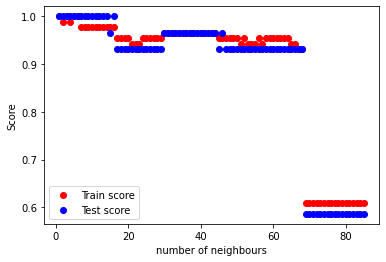

In [50]:
Stan_scale_acc_X = []
Stan_scale_acc_Y = []
Stan_scale_acc_Y_train = [] 

#since we are using 87 training rows we will try k values from 1 to 86
i = 1 
while i<86:
    Stan_scale_acc_X.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train_p, y_train)
    Stan_scale_acc_Y.append(knn.score(X_test_p, y_test))
    Stan_scale_acc_Y_train.append(knn.score(X_train_p, y_train))
    i += 1
    
fig, ax = plt.subplots()
X_stan = np.array(Stan_scale_acc_X)
Y_stan = np.array(Stan_scale_acc_Y)
Y_stan_train = np.array(Stan_scale_acc_Y_train)

ax.scatter(X_stan, Y_stan_train, c='r', label='Train score')
ax.scatter(X_stan, Y_stan, c='b', label='Test score')


plt.xlabel("number of neighbours")
plt.ylabel("Score")
plt.legend()
plt.show()

### Graph standard

In [51]:
best_acc = np.amax(Y_stan) 
index_best = np.where(Y_stan==best_acc)
index_best, best_acc

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15],
        dtype=int64),),
 1.0)

In [52]:
X_stan[30], Y_stan_train[30], Y_stan[30]

(31, 0.9655172413793104, 0.9655172413793104)

In [53]:
X_stan[31], Y_stan_train[31], Y_stan[31]

(32, 0.9655172413793104, 0.9655172413793104)

In [54]:
X_stan[32], Y_stan_train[32], Y_stan[32]

(33, 0.9655172413793104, 0.9655172413793104)

In [55]:
X_stan[29], Y_stan_train[29], Y_stan[29]

(30, 0.9655172413793104, 0.9655172413793104)

In [56]:
X_stan[28], Y_stan_train[28], Y_stan[28]

(29, 0.9540229885057471, 0.9310344827586207)

In [57]:
X_stan[27], Y_stan_train[27], Y_stan[27]

(28, 0.9540229885057471, 0.9310344827586207)

In [58]:
X_stan[26], Y_stan_train[26], Y_stan[26]

(27, 0.9540229885057471, 0.9310344827586207)

In [59]:
X_stan[24], Y_stan_train[24], Y_stan[24]

(25, 0.9540229885057471, 0.9310344827586207)

In [60]:
X_stan[20], Y_stan_train[20], Y_stan[20]

(21, 0.9425287356321839, 0.9310344827586207)

In [61]:
X_stan[18], Y_stan_train[18], Y_stan[18]

(19, 0.9540229885057471, 0.9310344827586207)

### K VALUE : 45 standardsca

In [70]:
#confusion matrix
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors = 45)
knn = knn.fit(X_train_p, y_train)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


y_act=pd.Series(y_test,name='actual')
y_prid=pd.Series(knn.predict(X_test),name='Predict')
df_confusion=pd.crosstab(y_act,y_prid)
df_confusion

Predict,0,1
actual,,
0,7,5
1,0,17


### confusion matrix

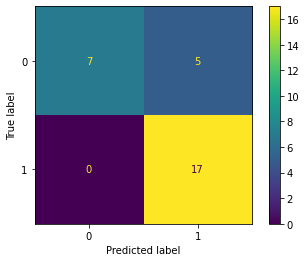

In [82]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC


cm = confusion_matrix(y_act, y_prid, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [88]:
new_example_rawdata = np.array([[117 , 8.433 , 0.6545 , 26.45367 , 1011.243343 , 6.43846]])
X_new = n1.transform(new_example_rawdata)
X_new

array([[1.00869565, 0.82531422, 0.409     , 0.76355259, 0.54731405,
        1.04962421]])

In [89]:
knn.predict(X_new)

array([1], dtype=int64)

In [90]:
le.inverse_transform(knn.predict(X_new))

array([1], dtype=int64)